In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import data as pd.DataFrame
da = pd.read_csv("/content/drive/MyDrive/customer_loan.csv", index_col = False, sep = ',')

#Data Visualization

In [ ]:
#visualizations
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline
import seaborn as sns


In [ ]:
#Missing Value Checking
da.isnull().sum()
#da.isna().sum()

customer_id       9149
loan_id            102
dob               7123
job_type          8315
loan_amount       1818
loan_duration     1781
paid_amount       1831
dpd              33032
dtype: int64

In [ ]:
#Missing Value Imputation with Mode for Categorical/discrete data

da['customer_id'] = da['customer_id'].fillna(da['customer_id'].mode()[0])
da['loan_id'] = da['loan_id'].fillna(da['loan_id'].mode()[0])
da['dob'] = da['dob'].fillna(da['dob'].mode()[0])
da['job_type'] = da['job_type'].fillna(da['job_type'].mode()[0])

In [ ]:
#Missing Value Imputation with Mean for Numerical Data/continuous data

da['loan_amount'] = da['loan_amount'].fillna(da['loan_amount'].mean())
da['loan_duration'] = da['loan_duration'].fillna(da['loan_duration'].mean())
da['paid_amount'] = da['paid_amount'].fillna(da['paid_amount'].mean())
da['dpd'] = da['dpd'].fillna(da['dpd'].mean())

In [ ]:
da.isnull().sum()
#da.isna().sum()

customer_id      0
loan_id          0
dob              0
job_type         0
loan_amount      0
loan_duration    0
paid_amount      0
dpd              0
dtype: int64

In [ ]:
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83554 entries, 0 to 83553
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   customer_id    83554 non-null  float64
 1   loan_id        83554 non-null  float64
 2   dob            83554 non-null  object 
 3   job_type       83554 non-null  object 
 4   loan_amount    83554 non-null  float64
 5   loan_duration  83554 non-null  float64
 6   paid_amount    83554 non-null  float64
 7   dpd            83554 non-null  float64
dtypes: float64(6), object(2)
memory usage: 5.1+ MB


In [ ]:
#Change data type
da['loan_amount'] = da['loan_amount'].astype(int)
da['loan_duration'] = da['loan_duration'].astype(int)
da['paid_amount'] = da['paid_amount'].astype(int)
da['dpd'] = da['dpd'].astype(int)

In [ ]:
#Calculating the Age
from datetime import datetime, date
def age(born):
    born = datetime.strptime(born, "%Y-%m-%d").date()
    today = date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

da['Age'] = da['dob'].apply(age)

In [ ]:
da.head()

,customer_id,loan_id,dob,job_type,loan_amount,loan_duration,paid_amount,dpd,Age
0,2.003024e+12,2.005021e+12,2000-01-06,Pegawai swasta,500000.0,5.0,195000.0,44.000000,23
1,2.003024e+12,2.005021e+12,2000-01-06,Pegawai swasta,500000.0,5.0,140000.0,11.112901,23
2,2.003024e+12,2.005021e+12,2000-01-06,Pegawai swasta,500000.0,5.0,140000.0,28.000000,23
3,2.003024e+12,2.005021e+12,2000-01-06,Pegawai swasta,500000.0,5.0,140000.0,34.000000,23
4,2.003024e+12,2.005021e+12,2000-01-06,Pegawai swasta,500000.0,5.0,149000.0,31.000000,23


In [ ]:
#Dropping the DOB column
da = da.drop(['dob'], axis=1)

In [ ]:
da['customer_id']=da['customer_id'].apply(lambda x: np.format_float_positional(x, trim="-"))
da['loan_id']=da['loan_id'].apply(lambda x: np.format_float_positional(x, trim="-"))

In [ ]:
da.head()

,customer_id,loan_id,job_type,loan_amount,loan_duration,paid_amount,dpd,Age
0,2003023548799,2005020645489,Pegawai swasta,500000.0,5.0,195000.0,44.000000,23
1,2003023548799,2005020645489,Pegawai swasta,500000.0,5.0,140000.0,11.112901,23
2,2003023548799,2005020645489,Pegawai swasta,500000.0,5.0,140000.0,28.000000,23
3,2003023548799,2005020645489,Pegawai swasta,500000.0,5.0,140000.0,34.000000,23
4,2003023548799,2005020645489,Pegawai swasta,500000.0,5.0,149000.0,31.000000,23


In [ ]:
print(da.describe())

        loan_amount  loan_duration   paid_amount           dpd           Age  \
count  8.355400e+04   83554.000000  8.355400e+04  83554.000000  83554.000000   
mean   2.260892e+06       5.788194  2.830639e+05     11.112901     35.123908   
std    2.676516e+06       2.077754  4.329158e+05     28.065393      6.944423   
min    8.061000e+03       1.000000  0.000000e+00   -230.000000     22.000000   
25%    5.000000e+05       4.000000  0.000000e+00     11.112901     29.000000   
50%    1.000000e+06       6.000000  1.180000e+05     11.112901     35.000000   
75%    3.000000e+06       7.000000  3.400000e+05     28.000000     40.000000   
max    1.800000e+07       9.000000  3.776000e+06    236.000000     60.000000   

           cust_seg  
count  83554.000000  
mean       0.431015  
std        0.495221  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        1.000000  
max        1.000000  


In [ ]:
#Checking duplicated Value
da[da.duplicated()]

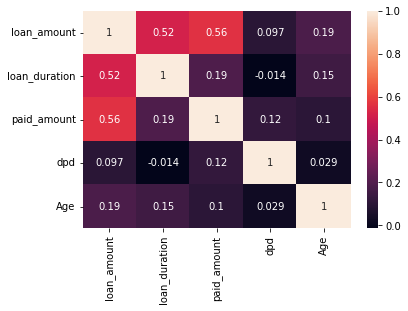

In [ ]:
#Checking correlation between columns within the dataset
sns.heatmap(da.corr(), annot=True)

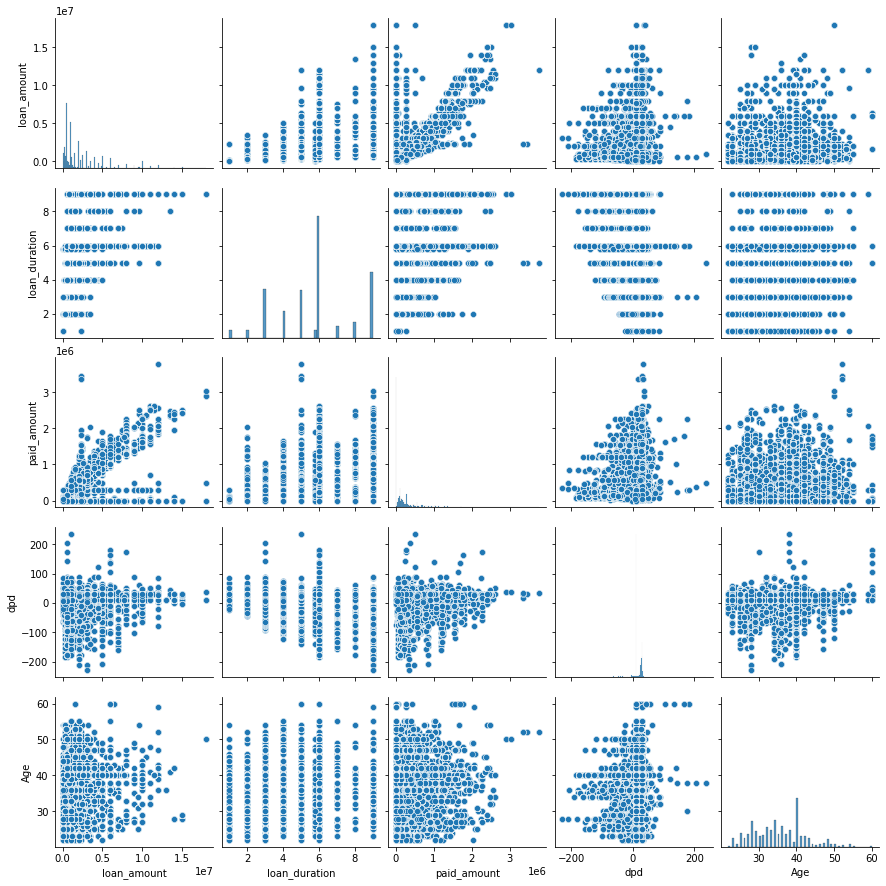

In [ ]:
sns.pairplot(da)

Making New Variable As Target variable (cust_seg)

In [ ]:
#Count tertiles
tertiles = da.quantile(q=[0.33,0.66])
tertiles = da.quantile(q=[0.33,0.66])

In [ ]:
tertiles.to_dict()

In [ ]:
#Making new target variable
da['cust_seg']= np.where (((da['loan_amount']>=2000000) & (da['paid_amount']>=227000) & (da['dpd']<=32)) |
                          ((da['loan_amount']>=2000000) & (da['paid_amount']>=227000) & (da['paid_amount']>0) & (da['paid_amount']<227000)) |
                          ((da['loan_amount']>=2000000) & (da['paid_amount']>0) & (da['paid_amount']<227000) & (da['dpd']<=32)) |
                          ((da['loan_amount']>538226) & (da['loan_amount']<2000000) & (da['paid_amount']>=227000) & (da['dpd']<=32)) |
                          ((da['loan_amount']>=2000000) & (da['paid_amount']>=227000) & (da['dpd']>=38)) |
                          ((da['loan_amount']>=2000000) & (da['paid_amount']>0) & (da['paid_amount']<227000) & (da['dpd']>32) & (da['dpd']<38)) |
                          ((da['loan_amount']>=2000000) & (da['paid_amount']<=0) & (da['dpd']<=32)) |
                          ((da['loan_amount']>538226) & (da['loan_amount']<2000000) & (da['paid_amount']>=227000) & (da['dpd']>32) & (da['dpd']<38)) |
                          ((da['loan_amount']>538226) & (da['loan_amount']<2000000) & (da['paid_amount']>0) & (da['paid_amount']<227000) & (da['dpd']<=32)) |
                          ((da['loan_amount']<=538226) & (da['paid_amount']>=227000) & (da['dpd']<=32)),1,0)


In [ ]:
#Value Count of variable Y
da.cust_seg.value_counts()

Recode predictor variable into categorical variable

In [ ]:
da['Age']=da['Age'].apply(lambda x: '0' if x<=24 else ('1' if x<=40 else '2'))

In [ ]:
da['loan_amount']=da['loan_amount'].apply(lambda x: '0' if x<=1000000 else ('1' if x<=5000000 else '2'))

In [ ]:
da['loan_duration']=da['loan_duration'].apply(lambda x: '0' if x<=3 else ('1' if x<=6 else '2'))

In [ ]:
da['paid_amount']=da['paid_amount'].apply(lambda x: '0' if x<=0 else ('1' if x<=1000000 else '2'))

In [ ]:
da['dpd']=da['dpd'].apply(lambda x: '0' if x<=30 else ('1' if x<=90 else '2'))

#Classification

Random Forest

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import numpy as np
import seaborn as sn

# instantiate the DecisionTreeClassifier model with criterion gini index

In [ ]:
from sklearn.preprocessing import LabelEncoder

#Recoding job_type column label
labelencoder = LabelEncoder()
da['job_type'] = labelencoder.fit_transform(da['job_type'])

In [ ]:
X = da.iloc[:,2:7]
Y = da['cust_seg']

In [ ]:
#Split the Data into Training and Testing Data
Xtrain, Xtest, Ytrain, Ytest = train_test_split (X,Y, stratify = Y, test_size= 0.2, random_state=0)

In [ ]:
#Check Data Shape
Xtrain.shape, Xtest.shape, Ytrain.shape, Ytest.shape

((66843, 5), (16711, 5), (66843,), (16711,))

In [ ]:
#Modeling
RF_Model = RandomForestClassifier()

In [ ]:
#Fitting the model
RF_fit = RF_Model.fit(Xtrain, Ytrain)

In [ ]:
RF_pred = RF_fit.predict(Xtest)
RF_pred

array([1, 0, 0, ..., 1, 1, 0])

In [ ]:
#Evaluate the Model
print(classification_report(RF_pred, Ytest))
print(accuracy_score(Ytest, RF_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      9001
           1       0.88      0.82      0.85      7710

    accuracy                           0.87     16711
   macro avg       0.87      0.86      0.86     16711
weighted avg       0.87      0.87      0.86     16711

0.8654179881515169


In [ ]:
from sklearn.metrics import confusion_matrix

#Confusion Matrix
cm_RF = confusion_matrix(Ytest, RF_pred)
cm_RF

array([[8130, 1378],
       [ 871, 6332]])

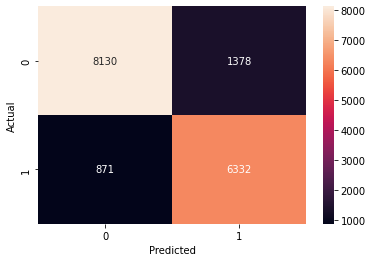

In [ ]:
RF_data = {'y_Actual':    np.array(Ytest),
        'y_Predicted': np.array(RF_pred)
        }

d = pd.DataFrame(RF_data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(d['y_Actual'], d['y_Predicted'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix, annot=True,fmt=".0f")
plt.show()

In [ ]:
Ytest.value_counts()

0    9508
1    7203
Name: cust_seg, dtype: int64

In [ ]:
from sklearn.inspection import permutation_importance
# view the feature scores
perm_importance = permutation_importance(RF_Model, Xtest, Ytest)
perm_importance

{'importances_mean': array([0.01215966, 0.26343127, 0.0596613 , 0.05029023, 0.00239363]),
 'importances_std': array([0.00045004, 0.00295868, 0.00294621, 0.00162943, 0.0003189 ]),
 'importances': array([[0.01214769, 0.01244689, 0.01148944, 0.01190832, 0.01280594],
        [0.26060679, 0.26294058, 0.26904434, 0.26144456, 0.2631201 ],
        [0.05972114, 0.05840464, 0.05828496, 0.0652265 , 0.05666926],
        [0.05331817, 0.04900963, 0.04930884, 0.04912932, 0.05068518],
        [0.00179522, 0.002633  , 0.00239363, 0.00269284, 0.00245347]])}

Text(0.5, 0, 'Permutation Importance')

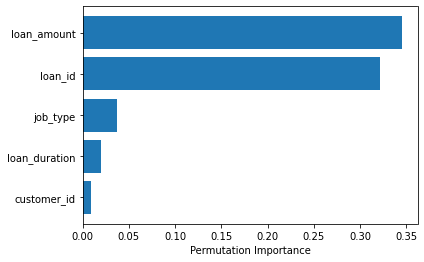

In [ ]:
import numpy as np
import pandas as pd
import shap
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(da.keys()[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")
